In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [3]:


train = pd.read_csv("/kaggle/input/titanic/train.csv")

test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.head(7)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [6]:
total = train.isnull().sum().sort_values(ascending = False)


In [7]:
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [9]:
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [10]:
womenY = women[women["Survived"] == 1]
womenN = women[women["Survived"] == 0]


In [11]:
menY = men[men["Survived"] == 1]
menN = men[men["Survived"] == 0]



In [12]:
womenY = womenY.Age.dropna()
womenN = womenN.Age.dropna()

menY = menY.Age.dropna()
menN = menN.Age.dropna()

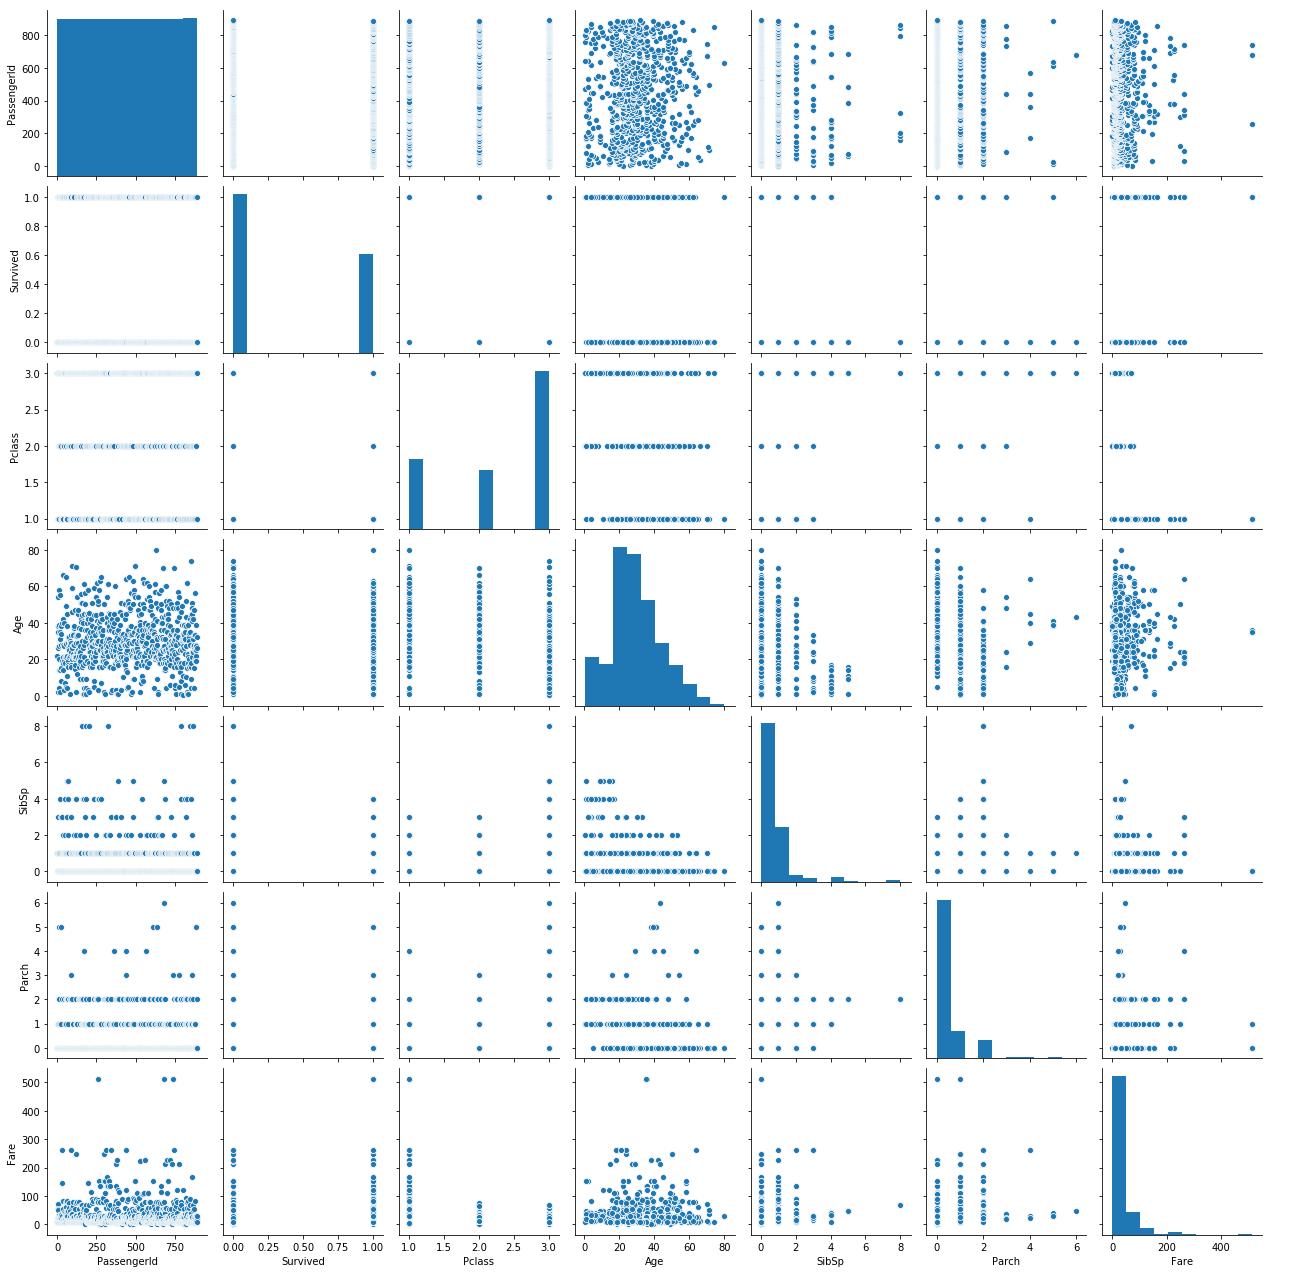

In [13]:
sns.pairplot(train)

Text(0.5, 1.0, 'male')

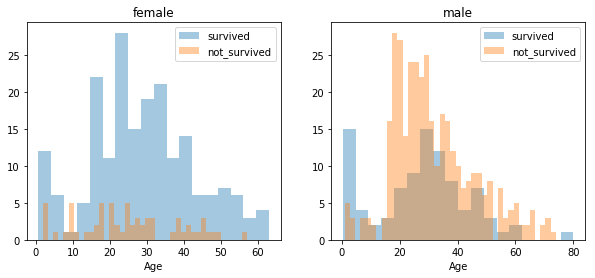

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
k = sns.distplot(womenY,ax = axes[0],kde =False,label = "survived",bins = 18)
k = sns.distplot(womenN,ax = axes[0],kde =False,label = "not_survived",bins = 40)
k.set_title("female")
k.legend()

l = sns.distplot(menY,ax = axes[1],kde =False,label = "survived",bins = 18)
l = sns.distplot(menN, ax = axes[1],kde =False,label = "not_survived",bins = 40)

l.legend()
l.set_title("male")

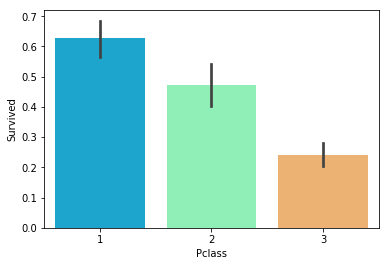

In [15]:
sns.barplot(x = "Pclass", y = "Survived", data = train,palette = "rainbow")

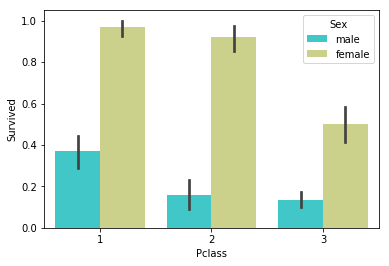

In [16]:
sns.barplot(x = "Pclass", y = "Survived", data = train,palette = "rainbow",hue = "Sex")

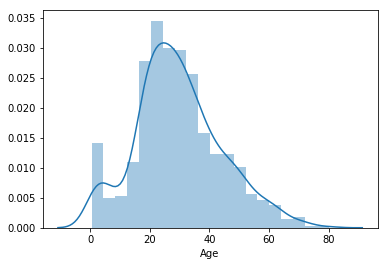

In [17]:
sns.distplot(train["Age"].dropna())

Preprocessing****

In [18]:
train = train.drop(["PassengerId"],axis = 1)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [20]:
train = train.drop(["Cabin"],axis = 1)
test = test.drop(["Cabin"],axis = 1)

In [21]:
#filling Null Values Of Age.
k = train["Age"].mean()
train["Age"] = train["Age"].fillna(value = k)

        
        

In [22]:
k = test["Age"].mean()
test["Age"] = test["Age"].fillna(value = k)

In [23]:
train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [24]:
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].fillna("S")

In [25]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ K

In [26]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [27]:
train = train.drop(["Ticket"],axis = 1)
test = test.drop(["Ticket"],axis = 1)

In [28]:
train = pd.get_dummies(train)

In [29]:
test = pd.get_dummies(test)

In [30]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [31]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [32]:
test = test.drop(["PassengerId"],axis = 1)


In [33]:
output = train["Survived"]
output

train = train.drop(["Survived"],axis = 1)
train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train = sc.fit_transform(train)
test  = sc.fit_transform(test)

In [35]:
#Machine Learning Models

In [36]:
# 1 AdaBoost

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(train,output)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [37]:
# Note: i missed that in Fare there is a missing value. Therefore i am going to use simple imputer to fill the missing values.

In [38]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

test = my_imputer.fit_transform(test)
test.shape

(418, 10)

In [39]:
pred = clf.predict(test)

In [40]:
clf.score(train,output)

0.8473625140291807

In [41]:
#2 decisionTree

In [42]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2.fit(train,output)
pred2 = clf2.predict(test)

In [43]:
clf2.score(train,output)

0.9820426487093153

In [44]:
from sklearn.svm import SVC
clf3 = SVC(kernel = "linear")
clf3.fit(train,output)
pred3 = clf3.predict(test)
clf3.score(train,output)

0.7867564534231201

In [45]:
from sklearn.naive_bayes import GaussianNB
clf4 = GaussianNB()
clf4.fit(train,output)
pred4 = clf4.predict(test)
clf4.score(train,output)

0.7912457912457912

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(max_depth=2, random_state=0)
clf5.fit(train,output)
pred5 = clf5.predict(test)
clf5.score(train,output)

0.7856341189674523

In [47]:
#cross validation 


from sklearn.model_selection import cross_val_score

In [48]:
accuracies = cross_val_score(clf ,train,output,cv = 5)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.74860335 0.79775281 0.8258427  0.8258427  0.80898876]
0.8014060636494884
0.02847197934789127


In [49]:
param = {"n_estimators" : [50,100,200,300],
         "learning_rate" : [1.0,2.0],           
         "algorithm" : ['SAMME', 'SAMME.R']}



In [50]:
from sklearn.model_selection import GridSearchCV
dv = GridSearchCV(estimator = clf ,
                  param_grid = param,
                  scoring = "accuracy",
                  cv = 5,
                  n_jobs = -1)



In [51]:
dv.fit(train,output)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=100,
                                          random_state=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1.0, 2.0],
                         'n_estimators': [50, 100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [52]:
dv.score(train,output)

0.8597081930415263

In [53]:
pred_final = dv.predict(test)

In [54]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [55]:
#submission

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred_final
    })
submission.to_csv('submission.csv', index=False)